In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 

In [3]:
df.head()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
adviser 32/60,125,256,6000,256,16,128,198,199,8.00
amdahl 470v/7,29,8000,32000,32,8,32,269,253,34.48
amdahl 470v/7a,29,8000,32000,32,8,32,220,253,34.48
amdahl 470v/7b,29,8000,32000,32,8,32,172,253,34.48
amdahl 470v/7c,29,8000,16000,32,8,16,132,132,34.48


In [4]:
# 2. Create NumPy arrays X and y from the data.  
# The target variable y should come from column 'prp' of df.  
# For X, choose two other columns of df.  
X = df[['erp','cs']].values
y = df['prp'].values

In [5]:
# 3.Create training and test sets using train_test_split().  
### Use Scikit-Learn's LinearRegression class to create a linear model from X_train and y_train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
# 4.What are the coefficients of your model?
reg.coef_

array([1.0205596 , 0.42216611])

In [7]:
# 5.Are both the predictor variables of your model important in predicting ‘prp’?

In [8]:
# 6.What is the R-squared value for your model?  
# (Use X_train and y_train to get the R-squared value.)  
# Did you get a good R-squared value?  
# What's the best possible R-squared value? # 1 is the best
r2 = reg.score(X_train,y_train)
print('R-squared: {:.2f}'.format(r2))

R-squared: 0.91


/Users/wicaksamunajat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted vs. actual values')

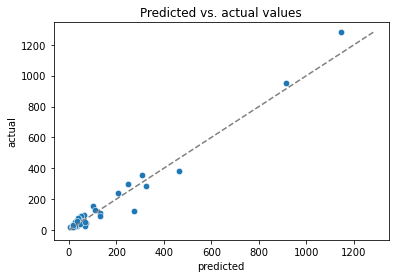

In [9]:
# 7. Produce a scatterplot in which the predicted prp values are shown on the x axis and the actual prp values are shown on the y axis.
predicted = reg.predict(X_test)
sns.scatterplot(y_test, predicted, s=40)
biggest = np.concatenate([y_test, predicted]).max()
plt.plot([biggest,0], [biggest,0], color='grey', linestyle='dashed')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Predicted vs. actual values')